In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\ASUS\AppData\Roaming\Python\Python310\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
import tensorflow
import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [4]:
df=pd.read_csv(r"G:\datasets\Admission_Predict_Ver1.1.csv")

In [5]:
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


In [6]:
df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [7]:
df.duplicated().any()

False

In [8]:
df.dtypes

Serial No.             int64
GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [10]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [13]:
df=df.drop(columns='Serial No.')

In [14]:
from sklearn.preprocessing import MinMaxScaler

In [15]:
m=MinMaxScaler()

In [20]:
df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1,0.87
496,337,117,5,5.0,5.0,9.87,1,0.96
497,330,120,5,4.5,5.0,9.56,1,0.93
498,312,103,4,4.0,5.0,8.43,0,0.73


In [24]:
X=df.iloc[:,0:7]

In [25]:
X

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1
496,337,117,5,5.0,5.0,9.87,1
497,330,120,5,4.5,5.0,9.56,1
498,312,103,4,4.0,5.0,8.43,0


In [26]:
y=df.iloc[:,-1]

In [27]:
y

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
495    0.87
496    0.96
497    0.93
498    0.73
499    0.84
Name: Chance of Admit , Length: 500, dtype: float64

In [28]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [29]:
X_train.shape

(400, 7)

In [30]:
X_test.shape

(100, 7)

In [31]:
X_train_scaled=m.fit_transform(X_train)

In [32]:
X_train_scaled

array([[0.96      , 0.89285714, 0.75      , ..., 0.875     , 0.8525641 ,
        1.        ],
       [0.58      , 0.64285714, 0.5       , ..., 0.375     , 0.63782051,
        0.        ],
       [0.92      , 0.71428571, 1.        , ..., 1.        , 0.94871795,
        1.        ],
       ...,
       [0.        , 0.42857143, 0.75      , ..., 0.375     , 0.21153846,
        0.        ],
       [0.98      , 0.96428571, 1.        , ..., 0.75      , 0.92948718,
        0.        ],
       [0.64      , 0.64285714, 0.75      , ..., 1.        , 0.74679487,
        1.        ]])

In [33]:
X_test_scaled=m.transform(X_test)

In [34]:
X_test_scaled

array([[0.56      , 0.5       , 0.25      , 0.75      , 0.75      ,
        0.35897436, 1.        ],
       [0.62      , 0.78571429, 0.75      , 0.75      , 1.        ,
        0.74358974, 0.        ],
       [0.62      , 0.67857143, 0.5       , 0.375     , 0.5       ,
        0.67307692, 1.        ],
       [0.76      , 0.85714286, 1.        , 0.875     , 1.        ,
        0.73076923, 1.        ],
       [0.22      , 0.35714286, 0.5       , 0.375     , 0.25      ,
        0.42628205, 1.        ],
       [0.48      , 0.46428571, 0.5       , 0.625     , 0.375     ,
        0.48076923, 0.        ],
       [0.16      , 0.32142857, 0.25      , 0.125     , 0.25      ,
        0.33974359, 0.        ],
       [0.24      , 0.64285714, 0.5       , 0.75      , 0.875     ,
        0.54487179, 0.        ],
       [0.14      , 0.28571429, 0.        , 0.125     , 0.25      ,
        0.3525641 , 0.        ],
       [0.68      , 0.46428571, 0.5       , 0.5       , 0.75      ,
        0.625     , 0. 

In [40]:
model=Sequential()
model.add(Dense(7,activation='relu',input_dim=7))
model.add(Dense(10,activation='relu'))
model.add(Dense(1,activation='linear'))

In [41]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 7)                 56        
                                                                 
 dense_3 (Dense)             (None, 10)                80        
                                                                 
 dense_4 (Dense)             (None, 1)                 11        
                                                                 
Total params: 147 (588.00 Byte)
Trainable params: 147 (588.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [42]:
model.compile(loss='mean_squared_error',optimizer='Adam')
history=model.fit(X_train_scaled,y_train,epochs=100,validation_split=0.2)

Epoch 1/100
10/10 [==============================] - 1s 15ms/step - loss: 0.3262 - val_loss: 0.2307
Epoch 2/100
10/10 [==============================] - 0s 5ms/step - loss: 0.1880 - val_loss: 0.1235
Epoch 3/100
10/10 [==============================] - 0s 5ms/step - loss: 0.0966 - val_loss: 0.0593
Epoch 4/100
10/10 [==============================] - 0s 6ms/step - loss: 0.0447 - val_loss: 0.0272
Epoch 5/100
10/10 [==============================] - 0s 5ms/step - loss: 0.0212 - val_loss: 0.0164
Epoch 6/100
10/10 [==============================] - 0s 5ms/step - loss: 0.0141 - val_loss: 0.0158
Epoch 7/100
10/10 [==============================] - 0s 5ms/step - loss: 0.0138 - val_loss: 0.0160
Epoch 8/100
10/10 [==============================] - 0s 5ms/step - loss: 0.0130 - val_loss: 0.0147
Epoch 9/100
10/10 [==============================] - 0s 6ms/step - loss: 0.0121 - val_loss: 0.0136
Epoch 10/100
10/10 [==============================] - 0s 5ms/step - loss: 0.0113 - val_loss: 0.0127
Epoch 11

In [43]:
y_pred=model.predict(X_test_scaled)

4/4 [==============================] - 0s 2ms/step


In [44]:
r2_score(y_test,y_pred)

0.7293530681277443

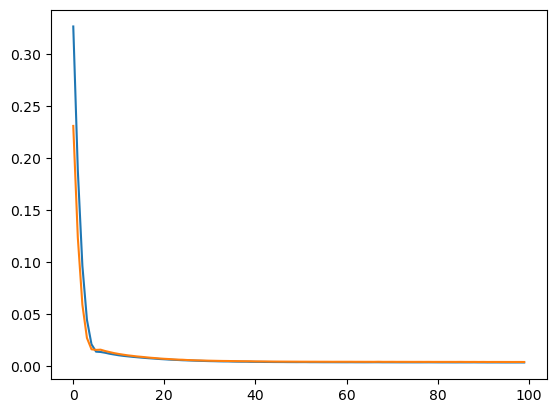

In [45]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])